<a href="https://colab.research.google.com/github/Skillstomorrow83/Data_Loves_Python/blob/main/%D0%94%D0%97_HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/DataLoves/data/yulu_rental.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [6]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [8]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

Після додавання колонок набор даних містить 10886 строк, 19 колонок різних типів, має розмір 1,4+Мб.

Виходячи з колонки hour і datetime ми бачимо, що зріз даних вдбувається кожної години.

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [9]:
#Завдання 1-1. Згрупуйте дані про кількість орендованих велосипедів (count) поденно.
count_rental_day = df['count'].resample('D').sum()
count_rental_day

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


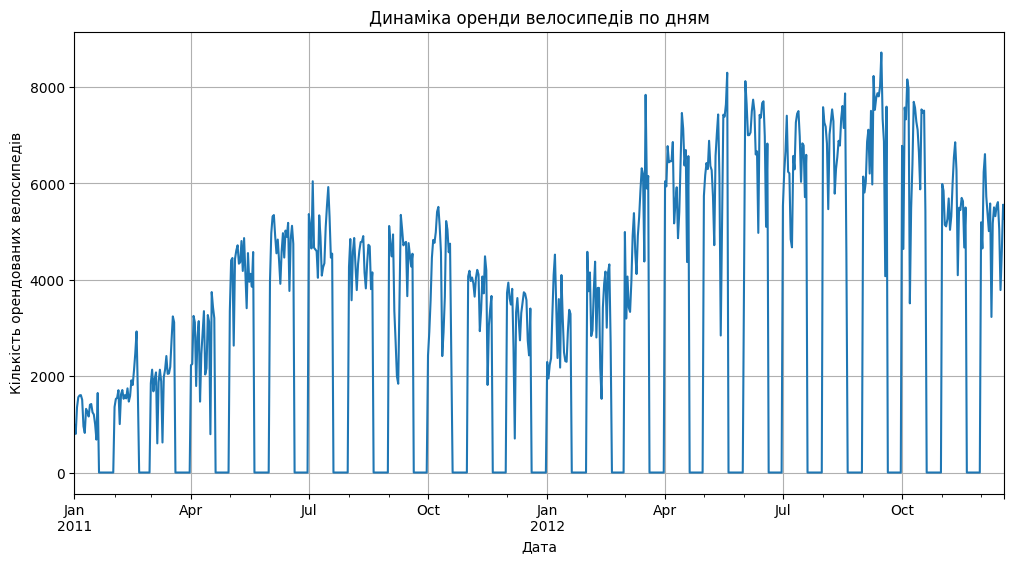

In [10]:
#Завдання 1-2. Побудуйте з методом DataFrame.plot() лінійний графік поденної кількості орендованих велосипедів (count) за весь період в даних.
#Завдання 1-3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
count_rental_day.plot.line(
    figsize = (12, 6),
    title = "Динаміка оренди велосипедів по дням",
    xlabel = "Дата",
    ylabel = "Кількість орендованих велосипедів",
    grid = True);

In [11]:
# Завдання 1-4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.
# Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
""" Графік має заломи напевно тому, що в 17ти тижнях оренда відсутня з якихось причин або відсутні дані по оренді.
Можливо в ці періоди проходить технічне обслуговування велосипедів."""
count_rental_week = df['count'].resample('W').sum() #тут ми бачимо, що 17 тижнів не мають даних про оренду
count_rental_week.value_counts()

,count
count,
0,17
1786,1
9025,1
9408,1
3333,1
...,...
5499,1
9840,1
37762,1


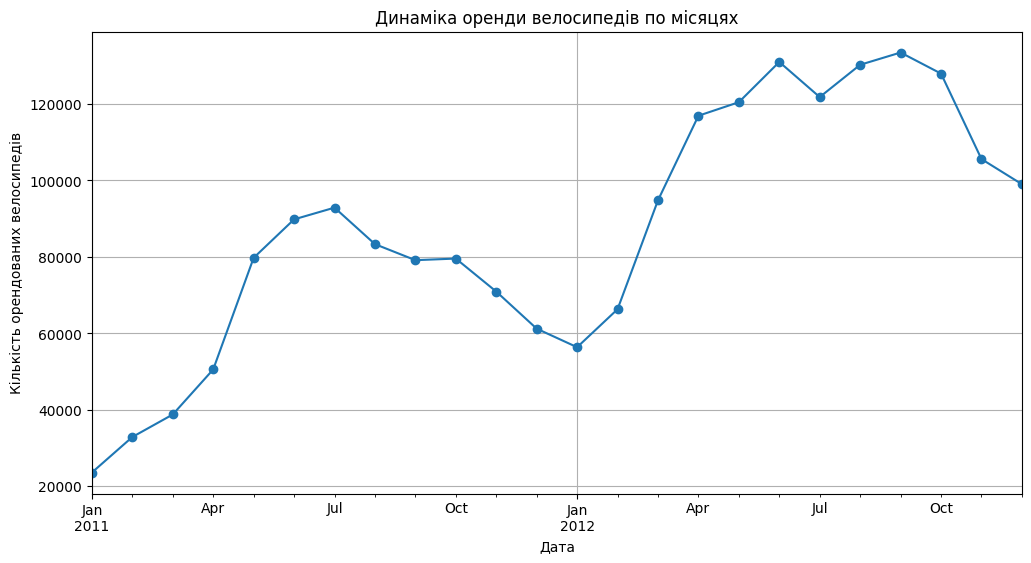

In [12]:
""" Щоб прибрати заломи можно зробити ресамплінг, наприклад, по місяцям."""
count_rental_month = df['count'].resample('ME').sum()
count_rental_month.plot.line(
    figsize = (12, 6),
    marker = 'o',
    title = "Динаміка оренди велосипедів по місяцях",
    xlabel = "Дата",
    ylabel = "Кількість орендованих велосипедів",
    grid = True);

In [13]:
# Які загальні тенденції ви бачите на графіку?
""" Ми бачимо, що кількість оренди в 2012р. закономірно виріс по зрівнянню з 2011р."""
# Чи помітні якісь сезонні коливання?
""" Так, помітний сезонний зріст оренди приблизно з весни до осені, а на зиму падає."""
# Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
""" Напевно останні 10 днів кожного місяця відзначаються аномально низьким (нульовим) значенням оренди.
Також є дуже високі значення, по місяцях це - літні місяці."""

' Напевно останні 10 днів кожного місяця відзначаються аномально низьким (нульовим) значенням оренди.\nТакож є дуже високі значення, по місяцях це - літні місяці.'


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [14]:
new_index = {1:"Весна", 2:"Літо", 3:"Осінь", 4:"Зима"}
season_rental = df.groupby('season')['count'].mean().rename(index=new_index)
season_rental

,count
season,
Весна,116.343261
Літо,215.251372
Осінь,234.417124
Зима,198.988296


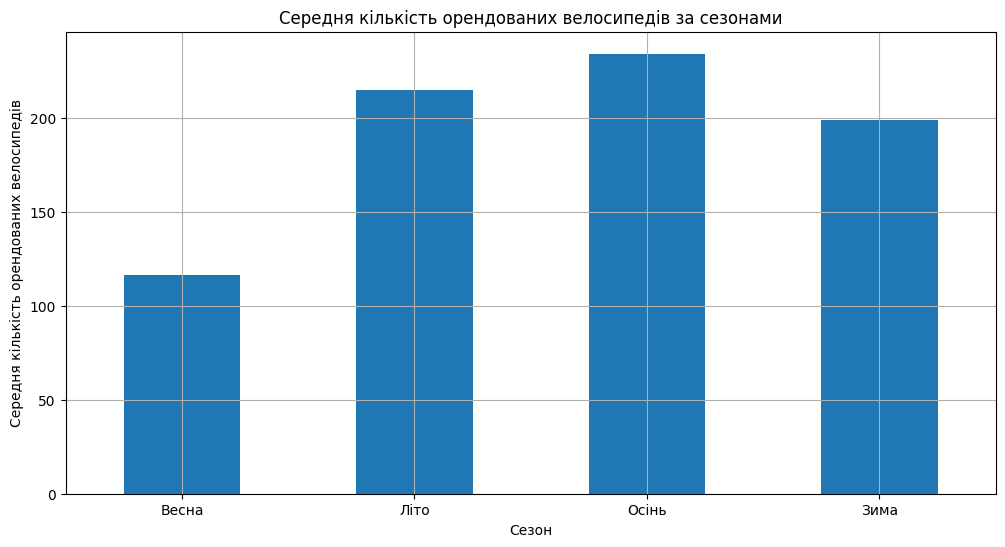

In [15]:
season_rental.plot.bar(
    figsize = (12, 6),
    title = "Середня кількість орендованих велосипедів за сезонами",
    xlabel = "Сезон",
    ylabel = "Середня кількість орендованих велосипедів",
    grid = True
)
plt.xticks(rotation=0);
#season_rental.set_axis(["Весна", "Літо", "Осінь", "Зима"])

In [16]:
max_rental = season_rental.max()
max_rental

234.417124039517

In [17]:
dif_rental = season_rental.max() / season_rental.min()
dif_rental

2.0148749597441986

1) В який сезон найбільша середня кількість оренди велосипедів?
Відповідь: Осінь. max_rental = 234,42

2) Як ви можете пояснити таку сезонну закономірність?
Відповідь: Думаю це пов'язано з початком навчального року і закінченням періоду відпусток.

3) У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?
Відповідь: Різниця приблизно в 2 рази (згідно розрахунку dif_rental).

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [18]:
avg_count_month = df.groupby('month')['count'].mean()
avg_count_month

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


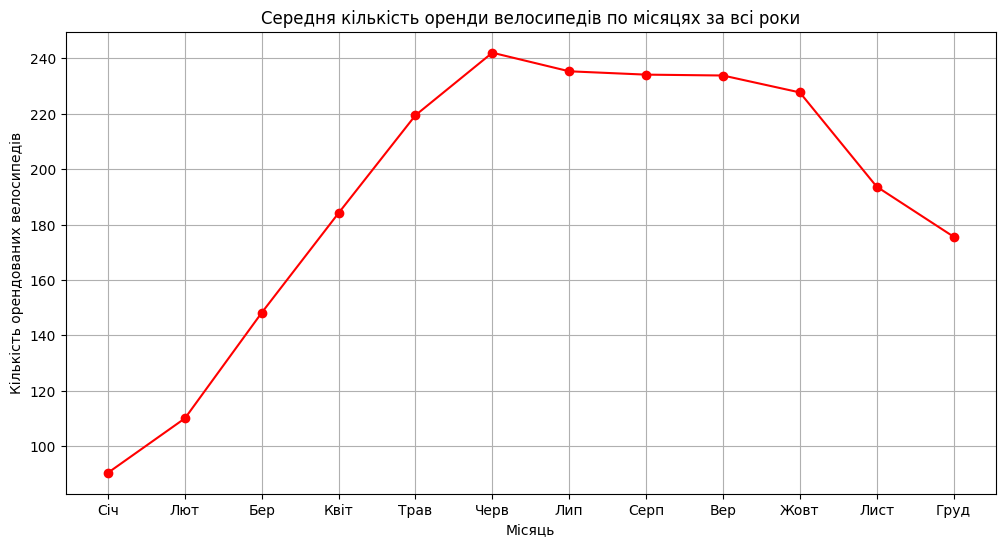

In [19]:
avg_count_month.plot.line(
    figsize = (12, 6),
    title = "Cередня кількість оренди велосипедів по місяцях за всі роки",
    xlabel = "Місяць",
    ylabel = "Кількість орендованих велосипедів",
    marker = 'o',
    color = 'red',
    grid = True
    )
months = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']
plt.xticks(ticks=range(1, 13), labels=months);

### 1) В які місяці спостерігається пік та спад оренди?
Пік оренди спостерігається в червні, а потім поступово спадає. В січні маємо найменший показник.
### 2) Чи збігається ця закономірність з результатами з попереднього завдання?
Закономірність не збігається з попереднім графіком, тому що в цьому завданні ми групуємо середні значення по місяцях, а в попередньому - по сезонам. Але я помітив, що сезони в описі даних не відповідають самим даним в Дата-фреймі (напр., місяцю січню відповідає 1й сезон, тобто весна).
### 3) Як може вплинути клімат на оренду велосипедів протягом року?
Не аналізуючи дані можу висунути гіпотезу, що в холодну погоду та дощ побачимо спад оренди, а в теплу суху - підйом.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [20]:
weather_count_pie = df['weather'].value_counts()
weather_count_pie

,count
weather,
1,7192
2,2834
3,859
4,1


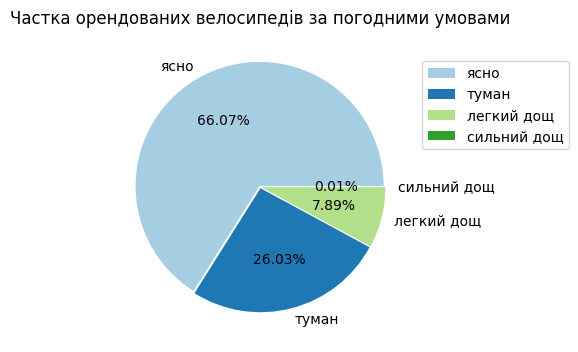

In [21]:
myexp = [0.01, 0.01, 0.01, 0.01]
weather_count_pie.plot.pie(
    figsize = (4, 8),
    title = "Частка орендованих велосипедів за погодними умовами",
    labels = ['ясно', 'туман', 'легкий дощ', 'сильний дощ'],
    xlabel = "",
    ylabel = "",
    autopct='%1.2f%%',
    explode = myexp,
    colors=plt.cm.Paired.colors,
    grid = True
)
plt.legend(bbox_to_anchor=(1, 0.6));

### Яка погода переважає в датасеті?
Ясна погода переважає в кількості оренди
### Чи є дні із сильним дощем? Яка їх частка?
Частка днів з сильним дощем становить 0,01%. Згідно вибірки - це один запис.
### Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
Чим більш суха погода, тим більший попит має оренда велосипедів.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [22]:
weather_count_plot = df.groupby('weather')['count'].sum()
weather_count_plot

,count
weather,
1,1476063
2,507160
3,102089
4,164


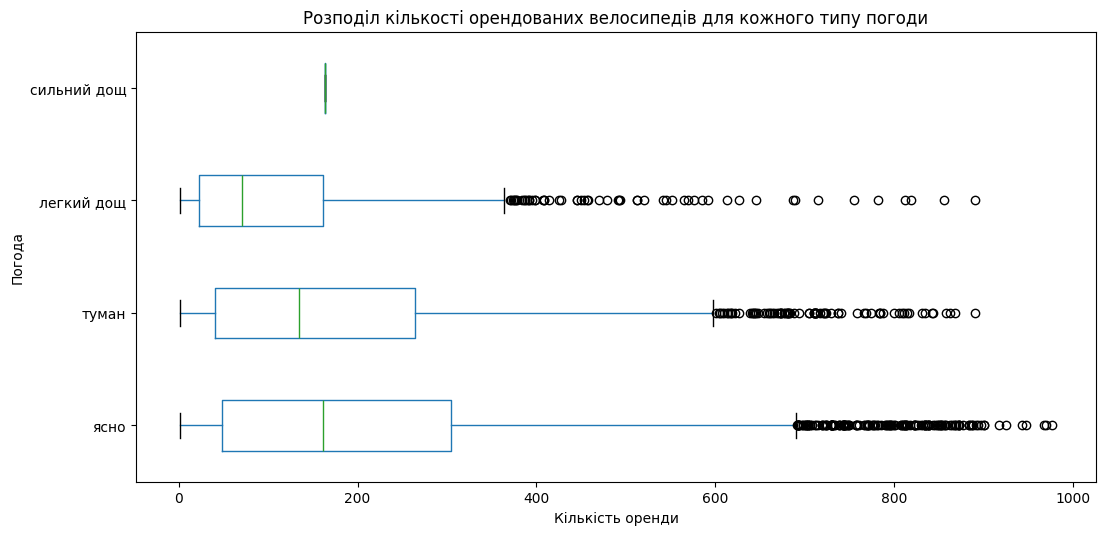

In [23]:
weather_str = ['ясно', 'туман', 'легкий дощ', 'сильний дощ']
df.boxplot(
    by='weather',
    column='count',
    vert=False,
    figsize=(12, 6),
    grid=False
)
plt.yticks(ticks=range(1, 5), labels=weather_str)
plt.title('Розподіл кількості орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  # Видаляємо автоматичний заголовок
plt.ylabel('Погода')
plt.xlabel('Кількість оренди')
plt.show();

### При якій погоді найбільший розкид у кількості оренди?
Найбільший розкид оренди - при ясній погоді. Також відмічу правобічну асиметрію майже при будь-якій погоді крім сильного дощу, тобто більшість значень розподілу зосереджені ближче до нижчих значень, а менша частина – до вищих.
### Чи є викиди (outliers) в даних? При якій погоді?
Викиди в даних є майже при будь-якій погоді крім сильного дощу.
### При якій погоді медіанне значення оренди найвище?
Найбільше медіанне значення - при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

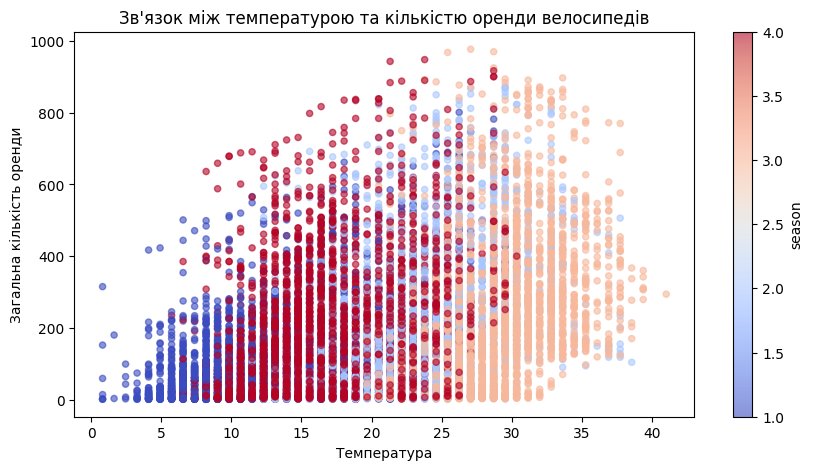

In [24]:
#Побудуйте діаграму розсіювання залежності між температурою (temp) та загальною кількістю оренди (count). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).
df.plot.scatter(
    x = 'temp',
    y = 'count',
    c = 'season',
    title = "Зв'язок між температурою та кількістю оренди велосипедів",
    xlabel = "Температура",
    ylabel = "Загальна кількість оренди",
    colormap = 'coolwarm',
    alpha = 0.6,
    figsize = (10, 5),
);

### Чи є зв'язок між температурою та кількістю оренди? Який?
Зв'якок точно є: за низьких температур (приблизно 0 -10 градусів) оренда теж низька, чим вище температура, тим вище тенденція росту оренди, але приблизно після 30 градусів вона знов опускається і після 40 градусів оренда практично припиняється.
P.S. Ми вже знаємо, що скоріш за все сезони виглядають наступним чином: 1=зима, 2=весна, 3=літо, 4=осінь.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

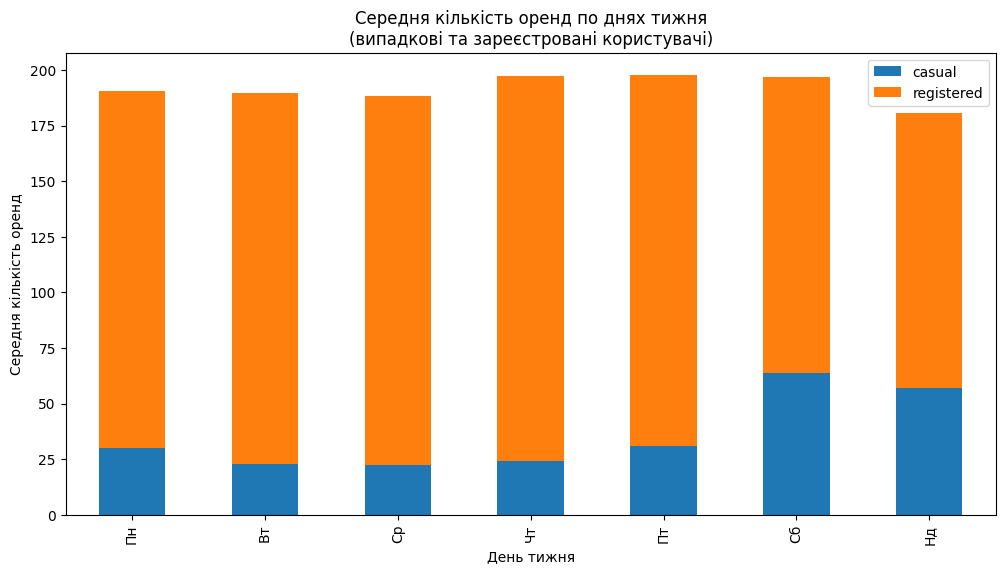

In [64]:
days_map = {0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Нд'}

grouped = df.groupby('weekday_num')[['casual', 'registered']].mean()
grouped.index = grouped.index.map(days_map)

grouped.plot(
    kind='bar',
    xlabel='День тижня',
    ylabel='Середня кількість оренд',
    stacked=True,
    title='Середня кількість оренд по днях тижня\n(випадкові та зареєстровані користувачі)',
    figsize=(12, 6)
    );


### В які дні тижня більше оренд від зареєстрованих користувачів?
У всі дні тижня більшість оренд бачимо від registered users. Але у вихідні помітно зростає частка випадкових користувачів.
### Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
Думаю в будні більше користуються велосипедами ті, хто регулярно їздить до роботи чи в інших справах, а на вихідні люди більше орендують велосипеди для прогулок тощо.